In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img = pd.read_csv('letterA.csv').to_numpy()

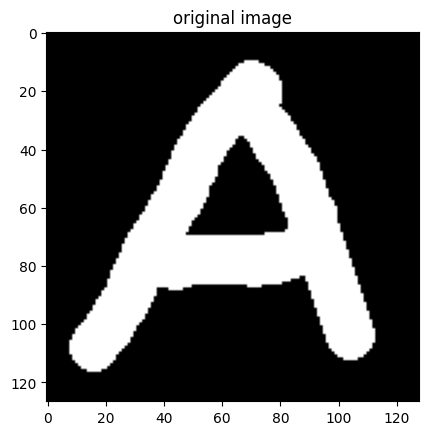

In [3]:
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.show()

Q1

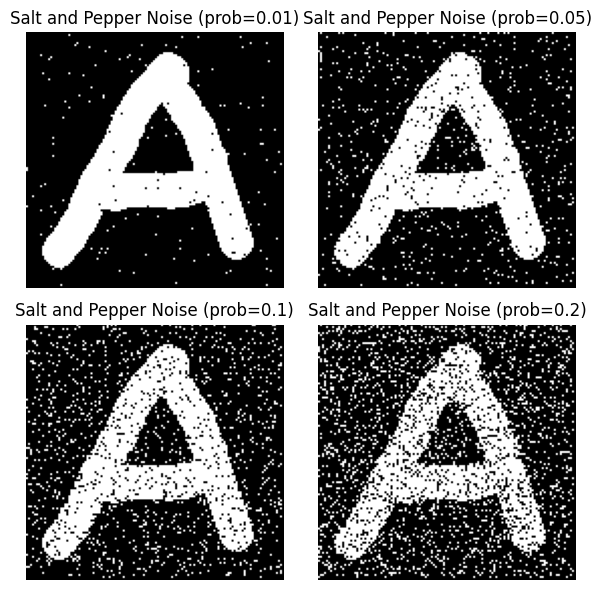

In [4]:
def salt_and_pepper_noise(image, prob):
    noisy = np.copy(image)
    total_pixels = image.size
    num_salt = np.ceil(prob * total_pixels)
    num_pepper = np.ceil(prob * total_pixels)

    # Add salt noise
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy[coords[0], coords[1]] = 1

    # Add pepper noise
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy[coords[0], coords[1]] = -1

    return noisy

# Probabilities for salt and pepper noise
probs = [0.01, 0.05, 0.1, 0.2]

# Plotting the images
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes = axes.ravel()

noisy_images = []

for i, prob in enumerate(probs):
    noisy_img = salt_and_pepper_noise(img, prob)
    noisy_images.append(noisy_img)
    axes[i].imshow(noisy_img, cmap='gray')
    axes[i].set_title(f'Salt and Pepper Noise (prob={prob})')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Q2

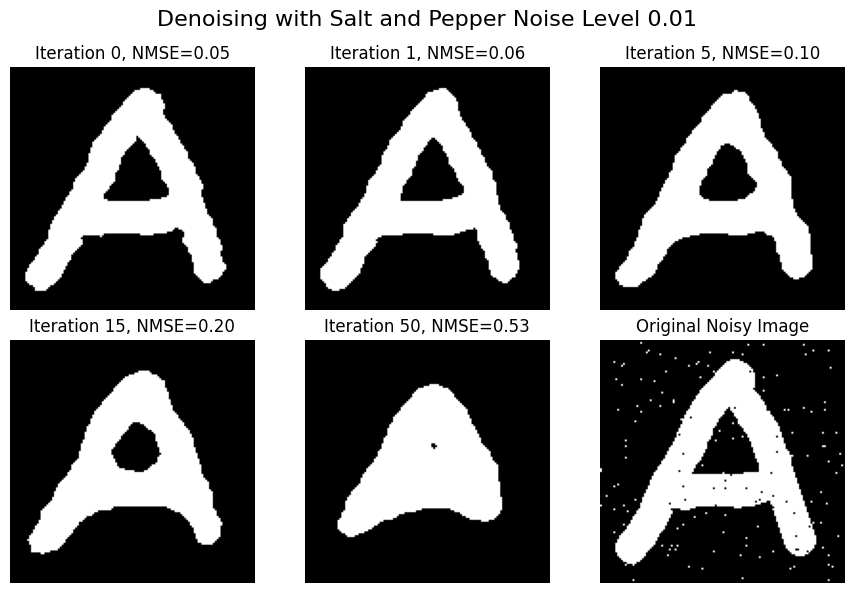

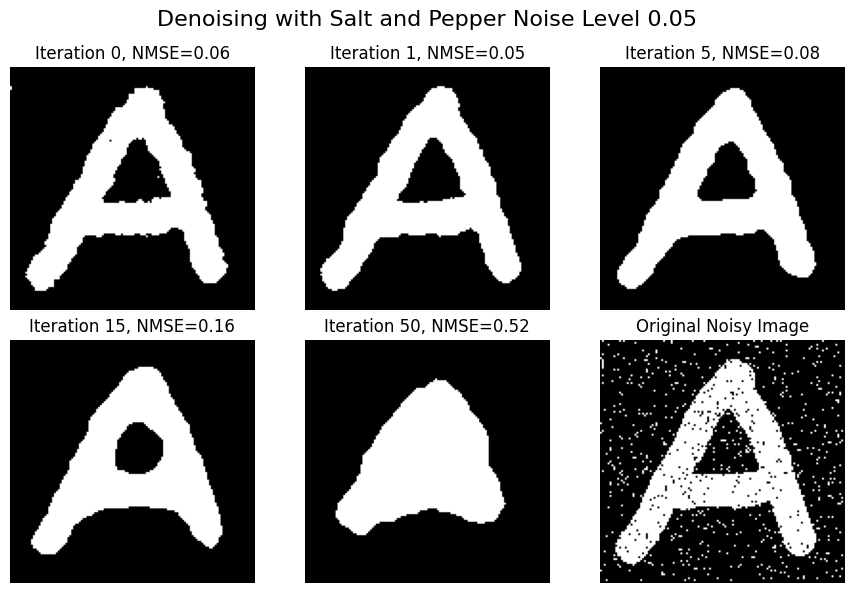

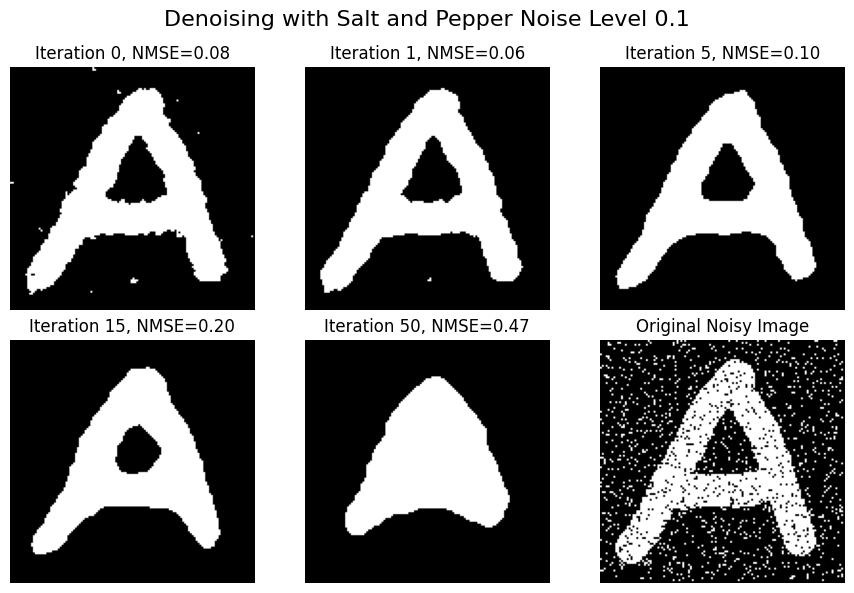

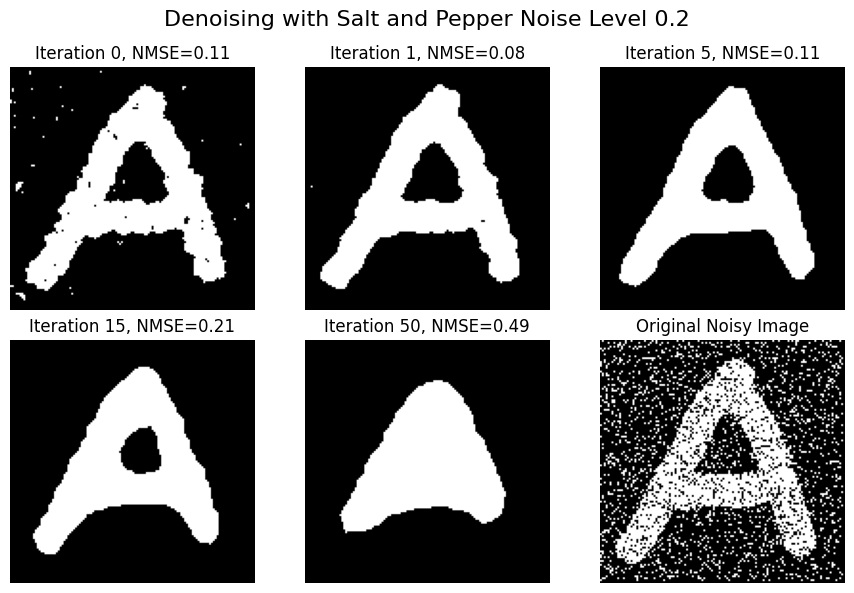

In [5]:
def eneregy_function(image, h=0.5, beta=1.5, nu=2):
    x = np.copy(image)

    n_pixels = x.size
    indices = np.arange(n_pixels)
    np.random.shuffle(indices)
    height, width = x.shape
    temp_x = np.copy(x)
    for j in indices:
        k, n = np.unravel_index(j, x.shape)

        neighbors = 0
        if k > 0:
            neighbors += x[k - 1, n]
        if k < height - 1:
            neighbors += x[k + 1, n]
        if n > 0:
            neighbors += x[k, n - 1]
        if n < width - 1:
            neighbors += x[k, n + 1]
        # Add corner neighbors
        if k > 0 and n > 0:
            neighbors += x[k - 1, n - 1]
        if k > 0 and n < width - 1:
            neighbors += x[k - 1, n + 1]
        if k < height - 1 and n > 0:
            neighbors += x[k + 1, n - 1]
        if k < height - 1 and n < width - 1:
            neighbors += x[k + 1, n + 1]
        
                    
        best_energy = np.inf
        for value in [-1, 1]:
            # x[k, n] = value

            energy_1 = h * value

            energy_2 = -beta * neighbors * value

            energy_3 = nu * value * image[k, n]

            total_energy = energy_1 + energy_2 + energy_3
            if total_energy < best_energy:
                best_energy = total_energy
                best_value = value
        x[k, n] = best_value

    # x=temp_x

    return x

def normalized_mean_square_error(original, denoised):
    return np.mean((original - denoised) ** 2) / np.mean(original ** 2)


iterations_max = 50
plot_iters = [0, 1, 5, 15, 50]

for m, noisy_image in enumerate(noisy_images):
    
    fig, axes = plt.subplots(2, 3, figsize=(9, 6))

    i = 0
    selected_image = noisy_image.copy()
    for iter in range(iterations_max+1):
        selected_image = eneregy_function(selected_image)
        NMSE = normalized_mean_square_error(img, selected_image)
        if iter in plot_iters:
            axes[i // 3, i % 3].imshow(selected_image, cmap='gray')
            axes[i // 3, i % 3].set_title(f'Iteration {iter}, NMSE={NMSE:.2f}')
            axes[i // 3, i % 3].axis('off')
            i += 1

    axes[i // 3, i % 3].imshow(noisy_image, cmap='gray')
    axes[i // 3, i % 3].set_title('Original Noisy Image')
    axes[i // 3, i % 3].axis('off')

    fig.suptitle(f'Denoising with Salt and Pepper Noise Level {probs[m]}', fontsize=16)
    plt.tight_layout()
    plt.show()
        



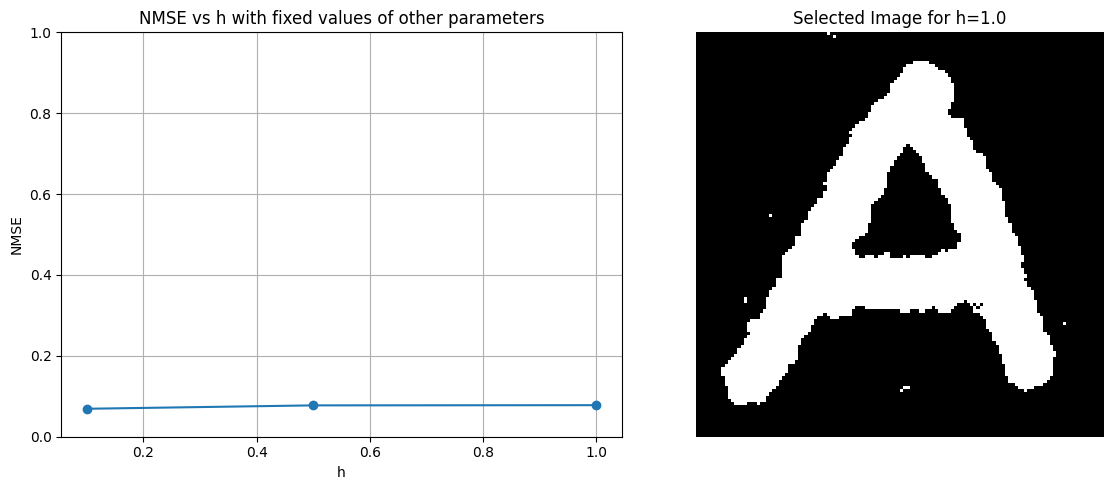

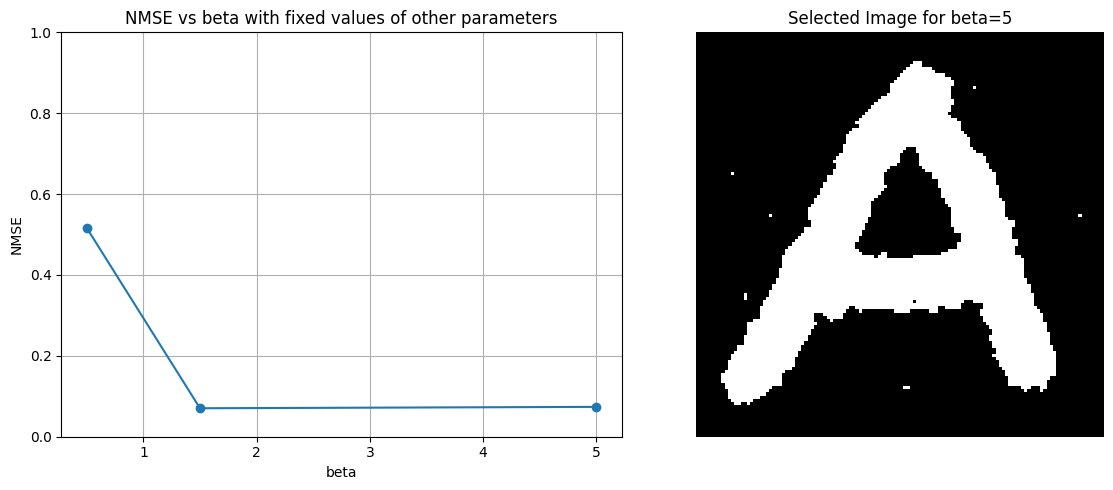

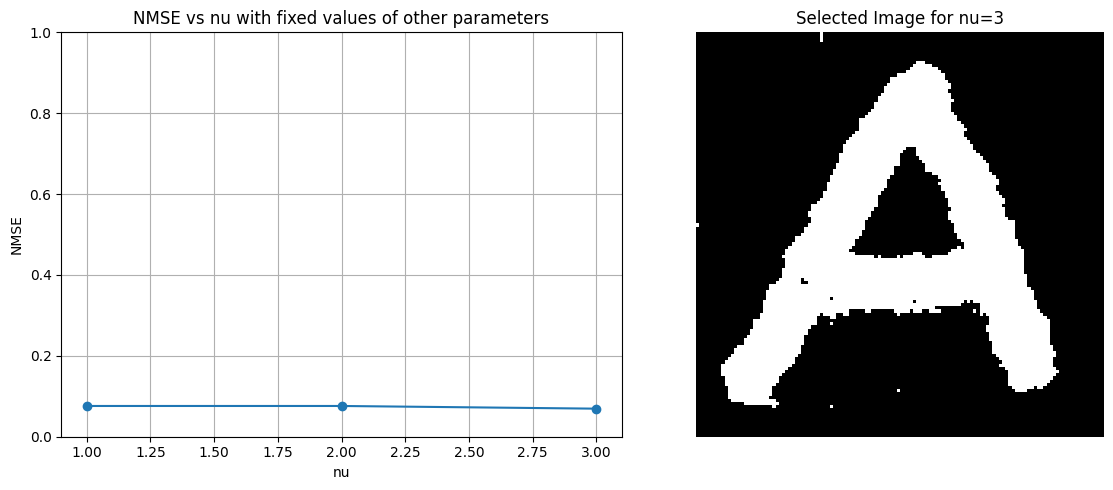

In [11]:
def plot_NMSE_vs_variable(h_values, beta_values, nu_values, variable_name, plot_idx):
    # Map variable name to respective parameter list
    parameter_map = {'h': h_values, 'beta': beta_values, 'nu': nu_values}
    variable_values = parameter_map[variable_name]

    # Compute NMSE for each set of parameters
    NMSE_values = []
    noisy_image = noisy_images[2]
    for h, beta, nu in zip(h_values, beta_values, nu_values):
        selected_image = eneregy_function(noisy_image.copy(), h=h, beta=beta, nu=nu)
        NMSE = normalized_mean_square_error(img, selected_image)
        NMSE_values.append(NMSE)

    # Plot the results
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot NMSE vs variable
    axes[0].plot(variable_values, NMSE_values, marker='o')  # Add marker for clarity
    axes[0].set_xlabel(variable_name)
    axes[0].set_ylabel('NMSE')
    axes[0].set_title(f'NMSE vs {variable_name} with fixed values of other parameters')
    axes[0].set_ylim(0, 1)
    axes[0].grid(True)  # Add grid for better readability
    
    # Plot the selected image for the last value of the variable
    selected_image = eneregy_function(noisy_image.copy(), h=h_values[-1], beta=beta_values[-1], nu=nu_values[-1])
    axes[1].imshow(selected_image, cmap='gray')
    axes[1].set_title(f'Selected Image for {variable_name}={variable_values[-1]}')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()


# Define a function to run plots with varying parameters
def generate_plots():
    plots = [
        {
            'h_values': [0.1, 0.5, 1.0],
            'beta_values': [2.5, 2.5, 2.5],
            'nu_values': [2, 2, 2],
            'variable_name': 'h',
            'plot_idx': 0,
        },
        {
            'h_values': [0.5, 0.5, 0.5],
            'beta_values': [0.5, 1.5, 5],
            'nu_values': [2, 2, 2],
            'variable_name': 'beta',
            'plot_idx': 1,
        },
        {
            'h_values': [0.5, 0.5, 0.5],
            'beta_values': [2.5, 2.5, 2.5],
            'nu_values': [1, 2, 3],
            'variable_name': 'nu',
            'plot_idx': 2,
        }
    ]

    for plot_config in plots:
        plot_NMSE_vs_variable(
            plot_config['h_values'],
            plot_config['beta_values'],
            plot_config['nu_values'],
            plot_config['variable_name'],
            plot_config['plot_idx']
        )

# Generate plots
generate_plots()



In [7]:
for i in range(5):
    print(f'Image {i+1}')

Image 1
Image 2
Image 3
Image 4
Image 5


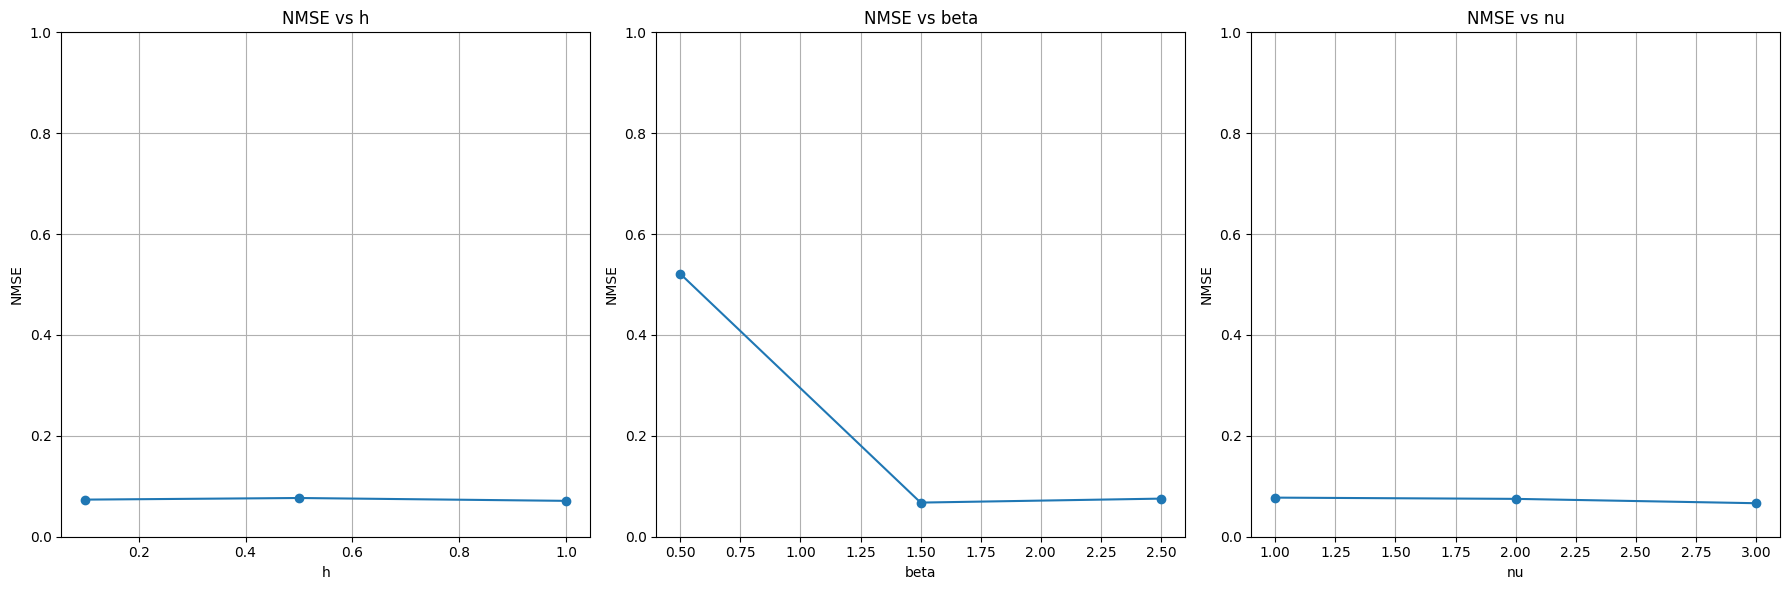

In [12]:
def plot_all_NMSE_vs_variables():
    # Define plot configurations
    plots = [
        {
            'h_values': [0.1, 0.5, 1.0],
            'beta_values': [2.5, 2.5, 2.5],
            'nu_values': [2, 2, 2],
            'variable_name': 'h',
            'plot_idx': 0,
        },
        {
            'h_values': [0.5, 0.5, 0.5],
            'beta_values': [0.5, 1.5, 2.5],
            'nu_values': [2, 2, 2],
            'variable_name': 'beta',
            'plot_idx': 1,
        },
        {
            'h_values': [0.5, 0.5, 0.5],
            'beta_values': [2.5, 2.5, 2.5],
            'nu_values': [1, 2, 3],
            'variable_name': 'nu',
            'plot_idx': 2,
        }
    ]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for idx, plot_config in enumerate(plots):
        h_values = plot_config['h_values']
        beta_values = plot_config['beta_values']
        nu_values = plot_config['nu_values']
        variable_name = plot_config['variable_name']

        # Map variable name to respective parameter list
        parameter_map = {'h': h_values, 'beta': beta_values, 'nu': nu_values}
        variable_values = parameter_map[variable_name]

        # Compute NMSE for each set of parameters
        NMSE_values = []
        noisy_image = noisy_images[2]
        for h, beta, nu in zip(h_values, beta_values, nu_values):
            selected_image = eneregy_function(noisy_image.copy(), h=h, beta=beta, nu=nu)
            NMSE = normalized_mean_square_error(img, selected_image)
            NMSE_values.append(NMSE)

        # Plot NMSE vs variable
        axes[idx].plot(variable_values, NMSE_values, marker='o')
        axes[idx].set_xlabel(variable_name)
        axes[idx].set_ylabel('NMSE')
        axes[idx].set_title(f'NMSE vs {variable_name}')
        axes[idx].set_ylim(0, 1)
        axes[idx].grid(True)

    plt.tight_layout()
    plt.show()


# Generate the single plot with three subplots
plot_all_NMSE_vs_variables()


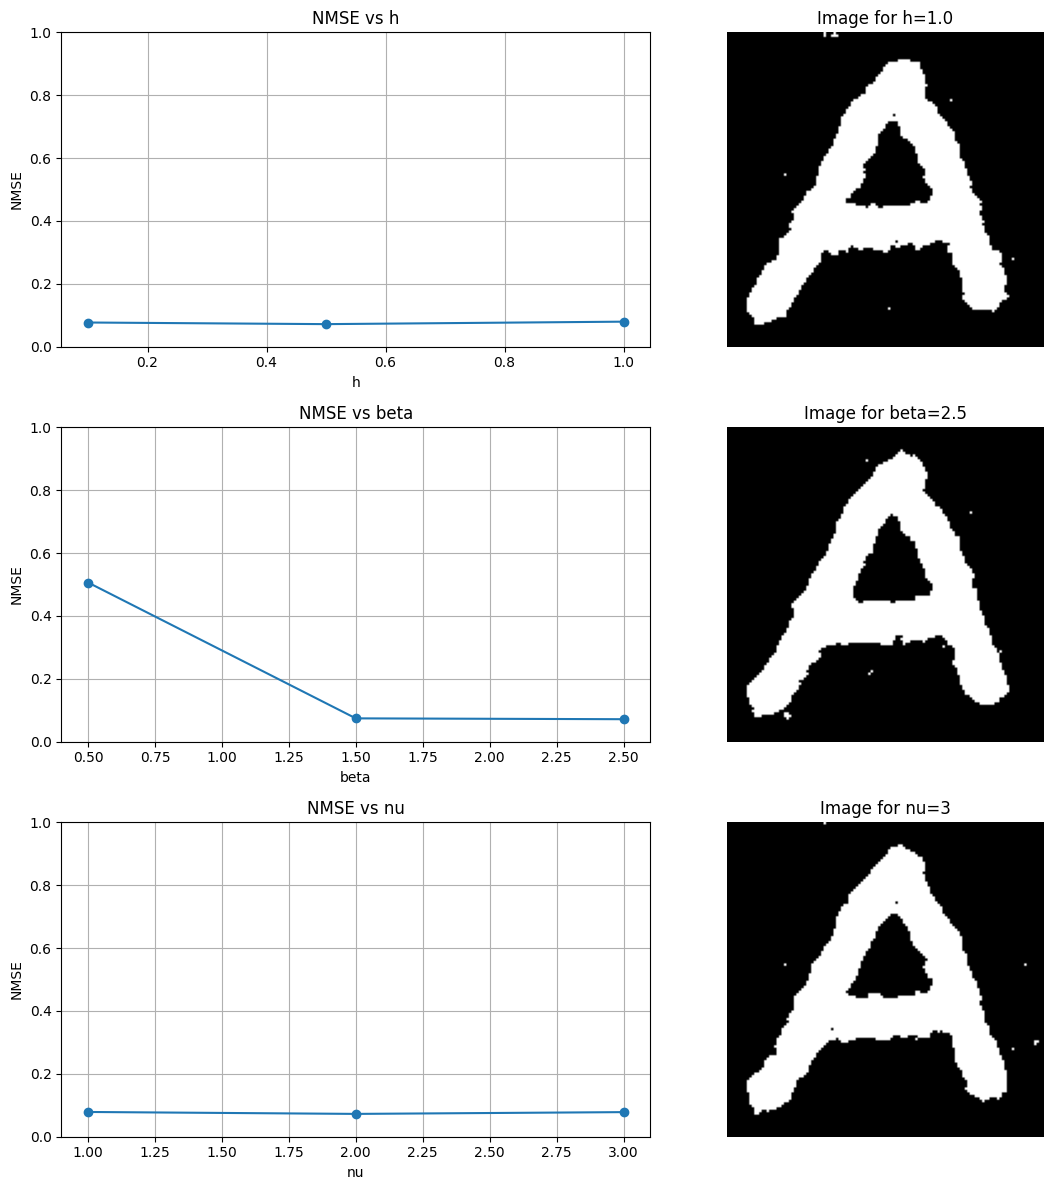

In [13]:
def plot_all_NMSE_and_images():
    # Define plot configurations
    plots = [
        {
            'h_values': [0.1, 0.5, 1.0],
            'beta_values': [2.5, 2.5, 2.5],
            'nu_values': [2, 2, 2],
            'variable_name': 'h',
        },
        {
            'h_values': [0.5, 0.5, 0.5],
            'beta_values': [0.5, 1.5, 2.5],
            'nu_values': [2, 2, 2],
            'variable_name': 'beta',
        },
        {
            'h_values': [0.5, 0.5, 0.5],
            'beta_values': [2.5, 2.5, 2.5],
            'nu_values': [1, 2, 3],
            'variable_name': 'nu',
        }
    ]

    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    for idx, plot_config in enumerate(plots):
        h_values = plot_config['h_values']
        beta_values = plot_config['beta_values']
        nu_values = plot_config['nu_values']
        variable_name = plot_config['variable_name']

        # Map variable name to respective parameter list
        parameter_map = {'h': h_values, 'beta': beta_values, 'nu': nu_values}
        variable_values = parameter_map[variable_name]

        # Compute NMSE for each set of parameters
        NMSE_values = []
        noisy_image = noisy_images[2]
        for h, beta, nu in zip(h_values, beta_values, nu_values):
            selected_image = eneregy_function(noisy_image.copy(), h=h, beta=beta, nu=nu)
            NMSE = normalized_mean_square_error(img, selected_image)
            NMSE_values.append(NMSE)

        # Plot NMSE vs variable
        axes[idx, 0].plot(variable_values, NMSE_values, marker='o')
        axes[idx, 0].set_xlabel(variable_name)
        axes[idx, 0].set_ylabel('NMSE')
        axes[idx, 0].set_title(f'NMSE vs {variable_name}')
        axes[idx, 0].set_ylim(0, 1)
        axes[idx, 0].grid(True)

        # Compute and plot the selected image for the last value of the variable
        selected_image = eneregy_function(
            noisy_image.copy(),
            h=h_values[-1],
            beta=beta_values[-1],
            nu=nu_values[-1]
        )
        axes[idx, 1].imshow(selected_image, cmap='gray')
        axes[idx, 1].set_title(f'Image for {variable_name}={variable_values[-1]}')
        axes[idx, 1].axis('off')

    plt.tight_layout()
    plt.show()


# Generate the 3x2 plot
plot_all_NMSE_and_images()
